In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Import data 

In [2]:
df = pd.read_csv('Linear_Regression_models.csv')
df.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [3]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [4]:
df.count()

ENGINESIZE              1067
CYLINDERS               1067
FUELCONSUMPTION_COMB    1067
CO2EMISSIONS            1067
dtype: int64

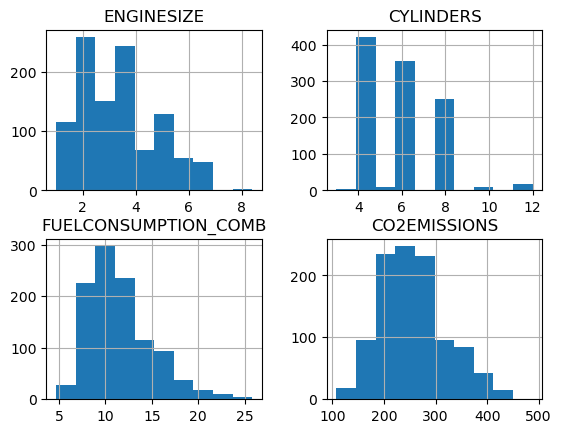

In [6]:
vis = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist()
plt.show()

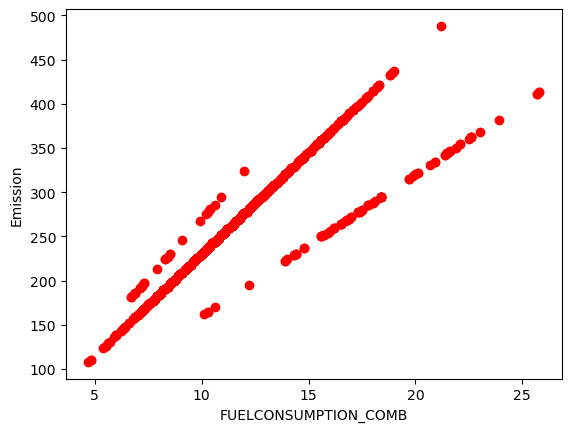

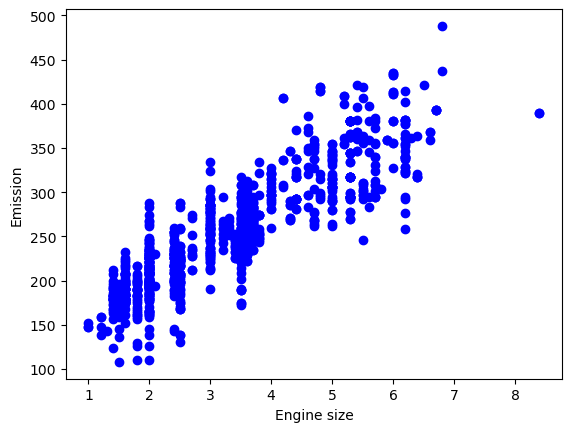

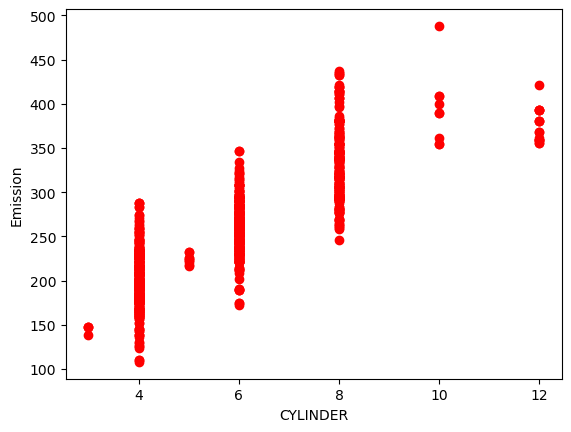

In [10]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# write your code here
plt.scatter(df.CYLINDERS , df.CO2EMISSIONS , color = 'red' )
plt.xlabel('CYLINDER')
plt.ylabel('Emission')
plt.show()

# Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [18]:
msk = np.random.rand(len(df)) < 0.8
train =df[msk]
test =df[~msk]

# Creation of Model

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.94277682]]
Intercept:  [125.73513812]


In [ ]:
regr.score(train_x,train)

# Plot The model Out with respect our Predicted data

Text(0, 0.5, 'Emission')

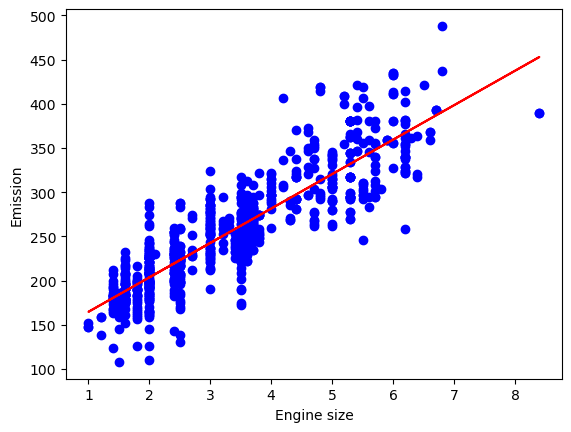

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation the predicted model by train data and predict the accuracy by r**2 , MSE , MAE

In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.76
Residual sum of squares (MSE): 1134.84
R2-score: 0.72


In [50]:
regr.score(train_x,train_y)

0.7183241200853345

# Plot the test data

Text(0, 0.5, 'Emission')

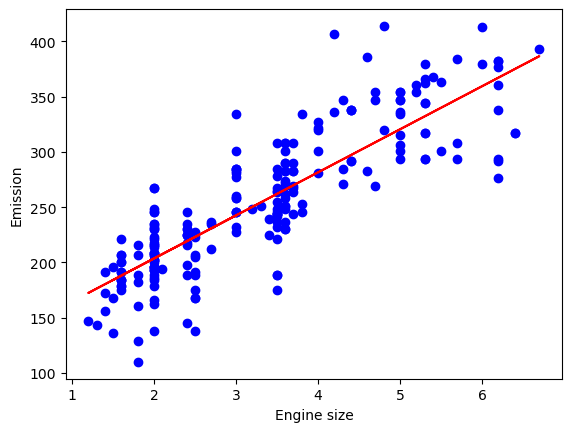

In [35]:
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, test_y_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [36]:
df.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221


In [37]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

In [38]:
regr = linear_model.LinearRegression()
regr.fit(train_x , train_y)

LinearRegression()

In [42]:
Predictions = regr.predict(test_x)
print("Predictions:", Predictions)


Predictions: [[165.23001351]
 [240.27071495]
 [232.28766161]
 [256.23682164]
 [227.4978296 ]
 [316.90802706]
 [211.53172291]
 [230.69105094]
 [233.88427227]
 [249.85037896]
 [249.85037896]
 [216.32155492]
 [304.13514171]
 [353.63007244]
 [316.90802706]
 [269.00970699]
 [265.81648565]
 [216.32155492]
 [292.95886703]
 [294.55547769]
 [334.47074442]
 [209.93511224]
 [205.14528023]
 [229.09444027]
 [205.14528023]
 [241.86732562]
 [273.799539  ]
 [232.28766161]
 [241.86732562]
 [273.799539  ]
 [305.73175238]
 [305.73175238]
 [305.73175238]
 [230.69105094]
 [267.41309632]
 [201.9520589 ]
 [241.86732562]
 [233.88427227]
 [232.28766161]
 [243.46393629]
 [243.46393629]
 [336.06735509]
 [305.73175238]
 [332.87413375]
 [249.85037896]
 [275.39614967]
 [273.799539  ]
 [336.06735509]
 [262.62326432]
 [342.45379776]
 [312.11819505]
 [414.30127786]
 [414.30127786]
 [334.47074442]
 [431.86399522]
 [482.95553663]
 [190.77578421]
 [197.16222689]
 [203.54866957]
 [364.80634713]
 [364.80634713]
 [241.86732

In [43]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
Predictions = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , Predictions) )

Mean absolute error: 131.73
Residual sum of squares (MSE): 19548.25
R2-score: -3.78


C:\Users\amit7\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
regr.score(test_x,test_y)

C:\Users\amit7\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.7346916605395482

In [44]:
df.head(1)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196


In [45]:
train_x = train[['CYLINDCYLINDERSERS']]
test_x = test[['CYLINDERS']]

In [46]:
regr = linear_model.LinearRegression()
regr.fit(train_x , train_y)

LinearRegression()

In [47]:
Predictions = regr.predict(test_x)
print("Predictions:", Predictions)


Predictions: [[202.91248095]
 [262.05392263]
 [262.05392263]
 [262.05392263]
 [202.91248095]
 [321.19536431]
 [202.91248095]
 [202.91248095]
 [202.91248095]
 [262.05392263]
 [262.05392263]
 [262.05392263]
 [321.19536431]
 [321.19536431]
 [380.33680598]
 [262.05392263]
 [321.19536431]
 [202.91248095]
 [321.19536431]
 [321.19536431]
 [439.47824766]
 [202.91248095]
 [202.91248095]
 [262.05392263]
 [202.91248095]
 [262.05392263]
 [321.19536431]
 [262.05392263]
 [262.05392263]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [202.91248095]
 [262.05392263]
 [202.91248095]
 [202.91248095]
 [202.91248095]
 [202.91248095]
 [262.05392263]
 [202.91248095]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [262.05392263]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [262.05392263]
 [262.05392263]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [321.19536431]
 [202.91248095]
 [202.91248095]
 [202.91248095]
 [321.19536431]
 [321.19536431]
 [202.91248

In [48]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
Predictions = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , Predictions) )

Mean absolute error: 25.97
Residual sum of squares (MSE): 1084.10
R2-score: 0.73


C:\Users\amit7\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
